In [24]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random

In [25]:
info_df = pd.read_csv("../../data/data_info.csv")
strong_imbalance = info_df.loc[info_df["imbalance"] <= 0.21, "name"]
weak_imbalance = info_df.loc[info_df["imbalance"] > 0.21, "name"]

In [26]:
results = get_all_results('experiment_comparison')
#results = results.loc[results['dataset_name'] != 'musk']
results

,config_id,run_id,name,oversampling,config.pop_size,config.n_iter,config.elitism,config.n_elites,config.init_depth,config.initializer,...,train.roc_auc,train.f1_score,train.precision,train.recall,test.accuracy,test.roc_auc,test.f1_score,test.precision,test.recall,dataset_name
0,1,1,GSGP,False,200,1000,True,1,6,rhh,...,0.779469,0.492308,0.676056,0.387097,0.804444,0.774854,0.500000,0.647059,0.407407,blood
1,1,2,GSGP,False,200,1000,True,1,6,rhh,...,0.781328,0.460733,0.656716,0.354839,0.808889,0.777886,0.469136,0.703704,0.351852,blood
2,1,3,GSGP,False,200,1000,True,1,6,rhh,...,0.819892,0.527919,0.712329,0.419355,0.773333,0.653346,0.337662,0.565217,0.240741,blood
3,1,4,GSGP,False,200,1000,True,1,6,rhh,...,0.802227,0.563636,0.645833,0.500000,0.813333,0.733810,0.543478,0.657895,0.462963,blood
4,1,5,GSGP,False,200,1000,True,1,6,rhh,...,0.796669,0.544554,0.705128,0.443548,0.795556,0.736409,0.465116,0.625000,0.370370,blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,1,GSGP,False,200,1000,True,1,6,rhh,...,0.928343,0.970100,0.954248,0.986486,0.654321,0.689338,0.766667,0.821429,0.718750,spect
176,2,2,GSGP,False,200,1000,True,1,6,rhh,...,0.744666,0.916667,0.871951,0.966216,0.913580,0.934743,0.947368,0.913043,0.984375,spect
177,2,3,GSGP,False,200,1000,True,1,6,rhh,...,0.887091,0.940790,0.916667,0.966216,0.876543,0.870404,0.924242,0.897059,0.953125,spect
178,2,4,GSGP,False,200,1000,True,1,6,rhh,...,0.864687,0.953642,0.935065,0.972973,0.790123,0.702206,0.868217,0.861538,0.875000,spect


In [27]:
# results = results.sort_values('test.f1_score', ascending=False)
# results['rank'] = results.groupby('dataset_name')['test.f1_score'].rank(ascending=False)

In [28]:
setting_dict = {'' : 'name', 'ff': 'config.fitness_function', 'os':'oversampling'}

In [29]:
ana = Analysis('experiment_comparison', settings_dict=setting_dict)
ana.results

,config_id,run_id,name,oversampling,config.pop_size,config.n_iter,config.elitism,config.n_elites,config.init_depth,config.initializer,...,train.f1_score,train.precision,train.recall,test.accuracy,test.roc_auc,test.f1_score,test.precision,test.recall,dataset_name,config_settings
0,1,1,GSGP,False,200,1000,True,1,6,rhh,...,0.492308,0.676056,0.387097,0.804444,0.774854,0.500000,0.647059,0.407407,blood,GSGP_ffsigmoid_rmse_osFalse_
1,1,2,GSGP,False,200,1000,True,1,6,rhh,...,0.460733,0.656716,0.354839,0.808889,0.777886,0.469136,0.703704,0.351852,blood,GSGP_ffsigmoid_rmse_osFalse_
2,1,3,GSGP,False,200,1000,True,1,6,rhh,...,0.527919,0.712329,0.419355,0.773333,0.653346,0.337662,0.565217,0.240741,blood,GSGP_ffsigmoid_rmse_osFalse_
3,1,4,GSGP,False,200,1000,True,1,6,rhh,...,0.563636,0.645833,0.500000,0.813333,0.733810,0.543478,0.657895,0.462963,blood,GSGP_ffsigmoid_rmse_osFalse_
4,1,5,GSGP,False,200,1000,True,1,6,rhh,...,0.544554,0.705128,0.443548,0.795556,0.736409,0.465116,0.625000,0.370370,blood,GSGP_ffsigmoid_rmse_osFalse_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,1,GSGP,False,200,1000,True,1,6,rhh,...,0.970100,0.954248,0.986486,0.654321,0.689338,0.766667,0.821429,0.718750,spect,GSGP_fff1_score_osFalse_
176,2,2,GSGP,False,200,1000,True,1,6,rhh,...,0.916667,0.871951,0.966216,0.913580,0.934743,0.947368,0.913043,0.984375,spect,GSGP_fff1_score_osFalse_
177,2,3,GSGP,False,200,1000,True,1,6,rhh,...,0.940790,0.916667,0.966216,0.876543,0.870404,0.924242,0.897059,0.953125,spect,GSGP_fff1_score_osFalse_
178,2,4,GSGP,False,200,1000,True,1,6,rhh,...,0.953642,0.935065,0.972973,0.790123,0.702206,0.868217,0.861538,0.875000,spect,GSGP_fff1_score_osFalse_


In [30]:
define_settings(results, setting_dict)

,config_id,run_id,name,oversampling,config.pop_size,config.n_iter,config.elitism,config.n_elites,config.init_depth,config.initializer,...,train.f1_score,train.precision,train.recall,test.accuracy,test.roc_auc,test.f1_score,test.precision,test.recall,dataset_name,config_settings
0,1,1,GSGP,False,200,1000,True,1,6,rhh,...,0.492308,0.676056,0.387097,0.804444,0.774854,0.500000,0.647059,0.407407,blood,GSGP_ffsigmoid_rmse_osFalse_
1,1,2,GSGP,False,200,1000,True,1,6,rhh,...,0.460733,0.656716,0.354839,0.808889,0.777886,0.469136,0.703704,0.351852,blood,GSGP_ffsigmoid_rmse_osFalse_
2,1,3,GSGP,False,200,1000,True,1,6,rhh,...,0.527919,0.712329,0.419355,0.773333,0.653346,0.337662,0.565217,0.240741,blood,GSGP_ffsigmoid_rmse_osFalse_
3,1,4,GSGP,False,200,1000,True,1,6,rhh,...,0.563636,0.645833,0.500000,0.813333,0.733810,0.543478,0.657895,0.462963,blood,GSGP_ffsigmoid_rmse_osFalse_
4,1,5,GSGP,False,200,1000,True,1,6,rhh,...,0.544554,0.705128,0.443548,0.795556,0.736409,0.465116,0.625000,0.370370,blood,GSGP_ffsigmoid_rmse_osFalse_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,1,GSGP,False,200,1000,True,1,6,rhh,...,0.970100,0.954248,0.986486,0.654321,0.689338,0.766667,0.821429,0.718750,spect,GSGP_fff1_score_osFalse_
176,2,2,GSGP,False,200,1000,True,1,6,rhh,...,0.916667,0.871951,0.966216,0.913580,0.934743,0.947368,0.913043,0.984375,spect,GSGP_fff1_score_osFalse_
177,2,3,GSGP,False,200,1000,True,1,6,rhh,...,0.940790,0.916667,0.966216,0.876543,0.870404,0.924242,0.897059,0.953125,spect,GSGP_fff1_score_osFalse_
178,2,4,GSGP,False,200,1000,True,1,6,rhh,...,0.953642,0.935065,0.972973,0.790123,0.702206,0.868217,0.861538,0.875000,spect,GSGP_fff1_score_osFalse_


In [31]:
a = []
a.append(1)
a

[1]

In [32]:
for row in results.iterrows():
    print(results.loc[row[0]])

config_id                                                                  1
run_id                                                                     1
name                                                                    GSGP
oversampling                                                           False
config.pop_size                                                          200
config.n_iter                                                           1000
config.elitism                                                          True
config.n_elites                                                            1
config.init_depth                                                          6
config.initializer                                                       rhh
config.tournament_size                                                     2
config.prob_const                                                        0.2
config.tree_functions                      [add, subtract, multiply, divide]

In [33]:
settings = results[['config_id', 'name', 'config.fitness_function']].fillna('').drop_duplicates().sort_values('config_id')
settings['config_settings'] = settings['name'] + '_' + settings['config.fitness_function']
settings = settings[['config_id', 'config_settings']]
settings
results = results.merge(settings, on='config_id')
results

,config_id,run_id,name,oversampling,config.pop_size,config.n_iter,config.elitism,config.n_elites,config.init_depth,config.initializer,...,train.f1_score,train.precision,train.recall,test.accuracy,test.roc_auc,test.f1_score,test.precision,test.recall,dataset_name,config_settings
0,1,1,GSGP,False,200,1000,True,1,6,rhh,...,0.492308,0.676056,0.387097,0.804444,0.774854,0.500000,0.647059,0.407407,blood,GSGP_sigmoid_rmse
1,1,2,GSGP,False,200,1000,True,1,6,rhh,...,0.460733,0.656716,0.354839,0.808889,0.777886,0.469136,0.703704,0.351852,blood,GSGP_sigmoid_rmse
2,1,3,GSGP,False,200,1000,True,1,6,rhh,...,0.527919,0.712329,0.419355,0.773333,0.653346,0.337662,0.565217,0.240741,blood,GSGP_sigmoid_rmse
3,1,4,GSGP,False,200,1000,True,1,6,rhh,...,0.563636,0.645833,0.500000,0.813333,0.733810,0.543478,0.657895,0.462963,blood,GSGP_sigmoid_rmse
4,1,5,GSGP,False,200,1000,True,1,6,rhh,...,0.544554,0.705128,0.443548,0.795556,0.736409,0.465116,0.625000,0.370370,blood,GSGP_sigmoid_rmse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,1,GSGP,False,200,1000,True,1,6,rhh,...,0.970100,0.954248,0.986486,0.654321,0.689338,0.766667,0.821429,0.718750,spect,GSGP_f1_score
176,2,2,GSGP,False,200,1000,True,1,6,rhh,...,0.916667,0.871951,0.966216,0.913580,0.934743,0.947368,0.913043,0.984375,spect,GSGP_f1_score
177,2,3,GSGP,False,200,1000,True,1,6,rhh,...,0.940790,0.916667,0.966216,0.876543,0.870404,0.924242,0.897059,0.953125,spect,GSGP_f1_score
178,2,4,GSGP,False,200,1000,True,1,6,rhh,...,0.953642,0.935065,0.972973,0.790123,0.702206,0.868217,0.861538,0.875000,spect,GSGP_f1_score


In [34]:
a = {'a': 'b', 'c': 'd'}
for key in a.keys():
    print(key)
list(a.keys())

a
c


['a', 'c']

In [50]:
get_aggregated_performance(results, 'test.f1_score')#.loc['blood', 'GSGP']

config_settings,GSGP_f1_score,GSGP_sigmoid_rmse
dataset_name,,
blood,0.461801,0.463079
clima,0.949054,0.968979
eeg,0.649634,0.566042
fertility,0.050000,0.224444
gina,0.820865,0.853011
hill,0.760792,0.847345
ilpd,0.831957,0.805038
kc,0.438132,0.346617
liver,0.574078,0.620535


In [68]:
data = get_aggregated_performance(results, 'test.accuracy').rename(index = {'dataset_name': 'dataset'})
data.to_csv('data.csv')

In [37]:
get_performance_difference_significance_table(results, 'GSGP_', 'test.accuracy', pivot = True)

KeyError: 'GSGP_'

In [ ]:
get_performance_difference_significance_table(results, 'GSGP', 'test.f1_score', pivot = False)

KeyError: 'GSGP'

In [ ]:
blood = results[results['dataset_name'] == 'blood']
blood

,config_id,run_id,name,oversampling,config.pop_size,config.n_iter,config.elitism,config.n_elites,config.init_depth,config.initializer,...,train.f1_score,train.precision,train.recall,test.accuracy,test.roc_auc,test.f1_score,test.precision,test.recall,dataset_name,config_settings
0,1,1,SLIM+ABS,False,50,200,True,1,6,rhh,...,0.521739,0.445714,0.629032,0.711111,0.727854,0.488189,0.424658,0.574074,blood,SLIM+ABS0.25
1,1,2,SLIM+ABS,False,50,200,True,1,6,rhh,...,0.477541,0.337793,0.814516,0.644444,0.699047,0.540230,0.391667,0.870370,blood,SLIM+ABS0.25
2,1,3,SLIM+ABS,False,50,200,True,1,6,rhh,...,0.526316,0.427136,0.685484,0.680000,0.635261,0.454545,0.384615,0.555556,blood,SLIM+ABS0.25
3,1,4,SLIM+ABS,False,50,200,True,1,6,rhh,...,0.553459,0.453608,0.709677,0.626667,0.653996,0.408451,0.329545,0.537037,blood,SLIM+ABS0.25
4,1,5,SLIM+ABS,False,50,200,True,1,6,rhh,...,0.514793,0.406542,0.701613,0.626667,0.640243,0.468354,0.355769,0.685185,blood,SLIM+ABS0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,20,6,GP,False,50,200,True,1,6,rhh,...,0.301887,0.191721,0.709677,0.235556,0.417912,0.328125,0.207921,0.777778,blood,GP
3236,20,7,GP,False,50,200,True,1,6,rhh,...,0.255856,0.164733,0.572581,0.222222,0.300087,0.279835,0.179894,0.629630,blood,GP
3237,20,8,GP,False,50,200,True,1,6,rhh,...,0.283761,0.180043,0.669355,0.217778,0.336907,0.272727,0.175532,0.611111,blood,GP
3238,20,9,GP,False,50,200,True,1,6,rhh,...,0.343499,0.214429,0.862903,0.235556,0.410765,0.353383,0.221698,0.870370,blood,GP


In [ ]:
import pandas as pd
import numpy as np

# Define dataset names and models
datasets = ["Clima (0.09)", "Fertility (0.12)", "Kc (0.15)", "Ozone (0.06)", 
            "Pc1 (0.07)", "Pc3 (0.10)", "Scene (0.18)", "Spect (0.21)"]
models = ["GSGP", "GP", "SVM", "DT", "NN", "BN", "NB", "LG", "RF", "E-RF", "R-RF", "O-RF"]

# Generate a DataFrame with random values between 0.1 and 1.0
np.random.seed(42)  # For reproducibility
data = np.round(np.random.uniform(0.1, 1.0, (len(datasets), len(models))), 2)
df = pd.DataFrame(data, index=datasets, columns=models)

# Add win/tie/loss row with random values
win_tie_loss = ["-"] + [f"{np.random.randint(3,6)}/{np.random.randint(1,4)}/{np.random.randint(0,3)}" for _ in range(len(models) - 1)]
df.loc["win/tie/loss"] = win_tie_loss

# Convert DataFrame to LaTeX format with proper formatting


print("✅ LaTeX table generated and saved as 'generated_table.tex'.")


✅ LaTeX table generated and saved as 'generated_table.tex'.


In [41]:
get_avg_ranking(results, 'test.f1_score').set_index('config_settings')

,avg_rank
config_settings,
GSGP_sigmoid_rmse,1.333333
GSGP_f1_score,1.666667


In [46]:
results[results['dataset_name'].isin(['blood', 'musk'])]

,config_id,run_id,name,oversampling,config.pop_size,config.n_iter,config.elitism,config.n_elites,config.init_depth,config.initializer,...,train.f1_score,train.precision,train.recall,test.accuracy,test.roc_auc,test.f1_score,test.precision,test.recall,dataset_name,config_settings
0,1,1,GSGP,False,200,1000,True,1,6,rhh,...,0.492308,0.676056,0.387097,0.804444,0.774854,0.500000,0.647059,0.407407,blood,GSGP_sigmoid_rmse
1,1,2,GSGP,False,200,1000,True,1,6,rhh,...,0.460733,0.656716,0.354839,0.808889,0.777886,0.469136,0.703704,0.351852,blood,GSGP_sigmoid_rmse
2,1,3,GSGP,False,200,1000,True,1,6,rhh,...,0.527919,0.712329,0.419355,0.773333,0.653346,0.337662,0.565217,0.240741,blood,GSGP_sigmoid_rmse
3,1,4,GSGP,False,200,1000,True,1,6,rhh,...,0.563636,0.645833,0.500000,0.813333,0.733810,0.543478,0.657895,0.462963,blood,GSGP_sigmoid_rmse
4,1,5,GSGP,False,200,1000,True,1,6,rhh,...,0.544554,0.705128,0.443548,0.795556,0.736409,0.465116,0.625000,0.370370,blood,GSGP_sigmoid_rmse
45,1,1,GSGP,False,200,1000,True,1,6,rhh,...,0.989619,0.993056,0.986207,0.860140,0.936081,0.843750,0.818182,0.870968,musk,GSGP_sigmoid_rmse
46,1,2,GSGP,False,200,1000,True,1,6,rhh,...,0.996564,0.993151,1.000000,0.839161,0.904420,0.813008,0.819672,0.806452,musk,GSGP_sigmoid_rmse
47,1,3,GSGP,False,200,1000,True,1,6,rhh,...,1.000000,1.000000,1.000000,0.776224,0.871565,0.733333,0.758621,0.709677,musk,GSGP_sigmoid_rmse
48,1,4,GSGP,False,200,1000,True,1,6,rhh,...,0.996540,1.000000,0.993103,0.853147,0.939865,0.844444,0.780822,0.919355,musk,GSGP_sigmoid_rmse
49,1,5,GSGP,False,200,1000,True,1,6,rhh,...,0.996540,1.000000,0.993103,0.846154,0.909000,0.803571,0.900000,0.725806,musk,GSGP_sigmoid_rmse


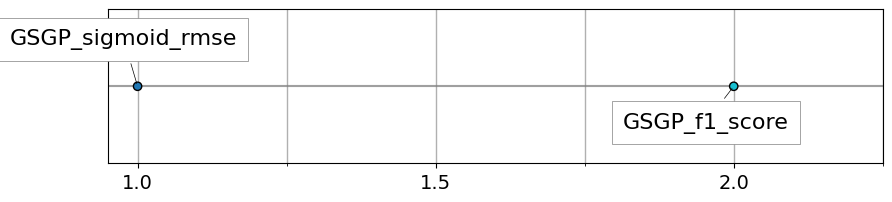

In [49]:
plot_avg_ranking(get_avg_ranking(results[results['dataset_name'].isin(['clima', 'fertility', 'Kc', 'Ozone', 'Pc1', 'Pc3', 'Scene', 'Spect'])], 'test.f1_score'))

In [54]:
get_avg_ranking(results[results['dataset_name'].isin(['clima', 'fertility', 'kc', 'ozone', 'pc1', 'pc3', 'scene', 'spect'])], 'test.f1_score')

,config_settings,avg_rank
0,GSGP_f1_score,1.5
1,GSGP_sigmoid_rmse,1.5


In [55]:
get_aggregated_performance(results[results['dataset_name'].isin(['clima', 'fertility', 'kc', 'ozone', 'pc1', 'pc3', 'scene', 'spect'])], 'test.f1_score')

config_settings,GSGP_f1_score,GSGP_sigmoid_rmse
dataset_name,,
clima,0.949054,0.968979
fertility,0.050000,0.224444
kc,0.438132,0.346617
ozone,0.150035,0.125874
pc1,0.295059,0.302143
pc3,0.351958,0.245554
scene,0.608296,0.697804
spect,0.881452,0.866928


In [43]:
get_ranking_significance(get_rankings(results.loc[results['dataset_name'] != 'musk'], 'test.f1_score'))

ValueError: At least 3 sets of samples must be given for Friedman test, got 2.

In [ ]:
results.groupby(['dataset_name', 'config_settings', 'run_id'])['test.accuracy'].mean().unstack().mean(axis=1).sort_values(ascending=False).unstack()

config_settings,GSGP_f1_score,GSGP_sigmoid_rmse
dataset_name,,
blood,0.687111,0.799111
clima,0.927160,0.935802
eeg,0.545483,0.649310
fertility,0.793333,0.813333
gina,0.806131,0.854545
hill,0.706593,0.849451
ilpd,0.586286,0.696000
kc,0.800316,0.857504
liver,0.582692,0.688462


In [ ]:
results.groupby(['dataset_name', 'config_settings'])['test.f1_score'].mean().unstack()

config_settings,GP_,GSGP_,SLIM*ABS_0.25,SLIM*ABS_0.5,SLIM*ABS_0.75,SLIM*SIG1_0.25,SLIM*SIG1_0.5,SLIM*SIG1_0.75,SLIM*SIG2_0.25,SLIM*SIG2_0.5,SLIM*SIG2_0.75,SLIM+ABS_0.25,SLIM+ABS_0.5,SLIM+ABS_0.75,SLIM+SIG1_0.25,SLIM+SIG1_0.5,SLIM+SIG1_0.75,SLIM+SIG2_0.25,SLIM+SIG2_0.5,SLIM+SIG2_0.75
dataset_name,,,,,,,,,,,,,,,,,,,,
blood,0.337921,0.376323,0.472783,0.472783,0.472783,0.472783,0.472783,0.472783,0.472783,0.472783,0.472783,0.482917,0.492846,0.485470,0.487827,0.506895,0.494258,0.495960,0.491314,0.494989
clima,0.155484,0.159182,0.218931,0.218931,0.218931,0.218931,0.218931,0.218931,0.218931,0.218931,0.218931,0.412220,0.472238,0.374011,0.338440,0.358614,0.307484,0.316239,0.364988,0.378377
eeg,0.454649,0.608364,0.621347,0.621347,0.621347,0.621347,0.621347,0.621347,0.621347,0.621347,0.621347,0.625776,0.625370,0.623209,0.624149,0.623240,0.623416,0.633039,0.627235,0.626368
fertility,0.237719,0.236765,0.175106,0.175106,0.175106,0.175106,0.175106,0.175106,0.175106,0.175106,0.175106,0.215253,0.117778,0.128359,0.185389,0.169800,0.170917,0.187904,0.089127,0.140789
gina,0.201584,0.413048,0.661889,0.661889,0.661889,0.661889,0.661889,0.661889,0.661889,0.661889,0.661889,0.751613,0.753107,0.757414,0.737753,0.764778,0.733227,0.727015,0.770638,0.738740
hill,0.361151,0.402233,0.664687,0.664687,0.664687,0.664687,0.664687,0.664687,0.664687,0.664687,0.664687,0.671309,0.662627,0.662942,0.670359,0.676262,0.673756,0.667375,0.694165,0.675856
ilpd,0.428451,0.440462,0.492574,0.492574,0.492574,0.492574,0.492574,0.492574,0.492574,0.492574,0.492574,0.515756,0.510263,0.512477,0.532415,0.524183,0.521820,0.521050,0.510589,0.524941
kc,0.239540,0.268236,0.408370,0.408370,0.408370,0.408370,0.408370,0.408370,0.408370,0.408370,0.408370,0.424117,0.424220,0.419451,0.421384,0.424030,0.425219,0.413411,0.415604,0.429810
liver,0.412721,0.465794,0.591419,0.591419,0.591419,0.591419,0.591419,0.591419,0.591419,0.591419,0.591419,0.592557,0.612964,0.601205,0.603752,0.611027,0.599278,0.586250,0.591160,0.599356


In [ ]:
get_aggregated_performance(results, 'test.f1_score').rank(axis=1, ascending=False, method='min')

config_settings,GP_,GSGP_,SLIM*ABS_0.25,SLIM*ABS_0.5,SLIM*ABS_0.75,SLIM*SIG1_0.25,SLIM*SIG1_0.5,SLIM*SIG1_0.75,SLIM*SIG2_0.25,SLIM*SIG2_0.5,SLIM*SIG2_0.75,SLIM+ABS_0.25,SLIM+ABS_0.5,SLIM+ABS_0.75,SLIM+SIG1_0.25,SLIM+SIG1_0.5,SLIM+SIG1_0.75,SLIM+SIG2_0.25,SLIM+SIG2_0.5,SLIM+SIG2_0.75
dataset_name,,,,,,,,,,,,,,,,,,,,
blood,20.0,19.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,5.0,8.0,7.0,1.0,4.0,2.0,6.0,3.0
clima,20.0,19.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,1.0,4.0,7.0,6.0,9.0,8.0,5.0,3.0
eeg,20.0,19.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,4.0,5.0,9.0,6.0,8.0,7.0,1.0,2.0,3.0
fertility,1.0,2.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,3.0,19.0,18.0,5.0,16.0,15.0,4.0,20.0,17.0
gina,20.0,19.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,4.0,3.0,7.0,2.0,8.0,9.0,1.0,6.0
hill,20.0,19.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,5.0,18.0,17.0,6.0,2.0,4.0,7.0,1.0,3.0
ilpd,20.0,19.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,6.0,9.0,7.0,1.0,3.0,4.0,5.0,8.0,2.0
kc,20.0,19.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,4.0,3.0,7.0,6.0,5.0,2.0,9.0,8.0,1.0
liver,20.0,19.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,7.0,1.0,4.0,3.0,2.0,6.0,18.0,17.0,5.0


In [ ]:
results.groupby(["dataset_name", "config_id"], as_index=False)['test.f1_score'].mean()

,dataset_name,config_id,test.f1_score
0,blood,1,0.489739
1,blood,2,0.495906
2,blood,3,0.485300
3,blood,4,0.497855
4,blood,5,0.502132
5,clima,1,0.597006
6,clima,2,0.546938
7,clima,3,0.460510
8,clima,4,0.238114
9,clima,5,0.452019


In [ ]:
get_rankings(results, 'test.f1_score')

,dataset_name,config_id,test.f1_score,rank
0,blood,1,0.489739,4.0
1,blood,2,0.495906,3.0
2,blood,3,0.485300,5.0
3,blood,4,0.497855,2.0
4,blood,5,0.502132,1.0
5,clima,1,0.597006,1.0
6,clima,2,0.546938,2.0
7,clima,3,0.460510,3.0
8,clima,4,0.238114,5.0
9,clima,5,0.452019,4.0


In [ ]:
results.groupby(['dataset_name', 'config_id', 'run_id'])['test.roc_auc'].mean().unstack().mean(axis=1).sort_values(ascending=False).unstack()

config_id,1,2,3,4,5
dataset_name,,,,,
blood,0.704646,0.713721,0.713840,0.700130,0.720695
clima,0.930792,0.888127,0.849710,0.699903,0.857819
eeg,0.620378,0.578697,0.590683,0.556187,0.610245
fertility,0.527885,0.601923,0.579808,0.646154,0.553846
gina,0.804494,0.791544,0.780960,0.635900,0.738208
hill,0.733513,0.645610,0.645598,0.536001,0.657209
ilpd,0.701488,0.706544,0.696112,0.677392,0.698128
kc,0.743076,0.763529,0.707730,0.711905,0.732695
liver,0.644545,0.645417,0.646970,0.607500,0.657197


In [ ]:
logs = get_all_logs('experiment4')
logs

,config_id,algorithm,dataset,seed,generation,elite_train_error,time,population_nodes,elite_test_error,elite_nodes,log_level
0,1,GSGP,blood,1,1,0.488119,0.035235,1674.0,0.541657,13,1
1,1,GSGP,blood,1,2,0.487492,0.040060,2110.0,0.538053,19,1
2,1,GSGP,blood,1,3,0.476080,0.034311,2476.0,0.447111,27,1
3,1,GSGP,blood,1,4,0.476010,0.034666,3212.0,0.483274,25,1
4,1,GSGP,blood,1,5,0.473637,0.038076,3612.0,0.513860,33,1
...,...,...,...,...,...,...,...,...,...,...,...
180283,4,SLIM+SIG2,spect,5,496,0.372243,0.011628,6319.0,0.378436,128,1
180284,4,SLIM+SIG2,spect,5,497,0.372243,0.010888,5601.0,0.378436,128,1
180285,4,SLIM+SIG2,spect,5,498,0.372243,0.011301,5199.0,0.378436,128,1
180286,4,SLIM+SIG2,spect,5,499,0.372243,0.010002,5121.0,0.378436,128,1


In [ ]:
results.groupby(['dataset_name', 'config_settings'])['test.accuracy'].mean().unstack()

config_settings,GSGP,SLIM*SIG1,SLIM+ABS,SLIM+SIG1,SLIM+SIG2
dataset_name,,,,,
blood,0.681778,0.680444,0.676444,0.672000,0.691556
clima,0.932716,0.601235,0.911111,0.890741,0.900000
eeg,0.553293,0.485826,0.504673,0.516466,0.533890
fertility,0.816667,0.720000,0.810000,0.793333,0.823333
gina,0.774313,0.623784,0.764482,0.761628,0.724736
hill,0.710165,0.524176,0.632967,0.611813,0.617857
ilpd,0.597143,0.520000,0.609143,0.584571,0.592000
kc,0.788468,0.739021,0.772196,0.771564,0.772986
liver,0.603846,0.561538,0.579808,0.575000,0.582692


In [ ]:
results.groupby(['dataset_name', 'config_settings'])['test.f1_score'].mean().unstack()

config_settings,GSGP,SLIM*SIG1,SLIM+ABS,SLIM+SIG1,SLIM+SIG2
dataset_name,,,,,
blood,0.489739,0.497855,0.495906,0.485300,0.502132
clima,0.597006,0.238114,0.546938,0.460510,0.452019
eeg,0.652423,0.626044,0.633546,0.637884,0.643573
fertility,0.148333,0.289232,0.226111,0.178547,0.161905
gina,0.800919,0.681503,0.788749,0.788321,0.766026
hill,0.753685,0.666061,0.712752,0.685834,0.689433
ilpd,0.520246,0.514833,0.527315,0.519750,0.521250
kc,0.438315,0.424623,0.439986,0.431447,0.437361
liver,0.601610,0.583086,0.602264,0.598363,0.602227


In [ ]:
results.groupby(['dataset_name', 'config_settings'])['test.roc_auc'].mean().unstack()

config_settings,GSGP,SLIM*SIG1,SLIM+ABS,SLIM+SIG1,SLIM+SIG2
dataset_name,,,,,
blood,0.704646,0.700130,0.713721,0.713840,0.720695
clima,0.930792,0.699903,0.888127,0.849710,0.857819
eeg,0.620378,0.556187,0.578697,0.590683,0.610245
fertility,0.527885,0.646154,0.601923,0.579808,0.553846
gina,0.804494,0.635900,0.791544,0.780960,0.738208
hill,0.733513,0.536001,0.645610,0.645598,0.657209
ilpd,0.701488,0.677392,0.706544,0.696112,0.698128
kc,0.743076,0.711905,0.763529,0.707730,0.732695
liver,0.644545,0.607500,0.645417,0.646970,0.657197


In [ ]:
results.groupby(["dataset_name", "config_settings"])['test.f1_score'].mean().unstack()

config_settings,GSGP,SLIM*SIG1,SLIM+ABS,SLIM+SIG1,SLIM+SIG2
dataset_name,,,,,
blood,0.489739,0.497855,0.495906,0.485300,0.502132
clima,0.597006,0.238114,0.546938,0.460510,0.452019
eeg,0.652423,0.626044,0.633546,0.637884,0.643573
fertility,0.148333,0.289232,0.226111,0.178547,0.161905
gina,0.800919,0.681503,0.788749,0.788321,0.766026
hill,0.753685,0.666061,0.712752,0.685834,0.689433
ilpd,0.520246,0.514833,0.527315,0.519750,0.521250
kc,0.438315,0.424623,0.439986,0.431447,0.437361
liver,0.601610,0.583086,0.602264,0.598363,0.602227


In [ ]:
ana = Analysis('experiment5')
ranks = ana.get_ranks_by_metric()
ranks['test.accuracy'].groupby(['config_id', 'dataset_name'])['rank'].mean().unstack()

dataset_name,blood,clima,eeg,fertility,gina,hill,ilpd,kc,liver,musk
config_id,,,,,,,,,,
1,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0
2,4.0,2.0,4.0,3.0,2.0,2.0,1.0,3.0,3.0,NaN
3,5.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,NaN
4,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN
5,1.0,3.0,2.0,1.0,4.0,3.0,3.0,2.0,2.0,NaN


In [ ]:
ranks

{'test.accuracy':    dataset_name  config_id  test.accuracy  rank
 0         blood          1       0.681778   2.0
 1         blood          2       0.676444   4.0
 2         blood          3       0.672000   5.0
 3         blood          4       0.680444   3.0
 4         blood          5       0.691556   1.0
 5         clima          1       0.932716   1.0
 6         clima          2       0.911111   2.0
 7         clima          3       0.890741   4.0
 8         clima          4       0.601235   5.0
 9         clima          5       0.900000   3.0
 10          eeg          1       0.553293   1.0
 11          eeg          2       0.504673   4.0
 12          eeg          3       0.516466   3.0
 13          eeg          4       0.485826   5.0
 14          eeg          5       0.533890   2.0
 15    fertility          1       0.816667   2.0
 16    fertility          2       0.810000   3.0
 17    fertility          3       0.793333   4.0
 18    fertility          4       0.720000   5.0
 19

In [ ]:
ranks['test.f1_score']

,dataset_name,config_id,test.f1_score,rank
0,blood,1,0.489739,4.0
1,blood,2,0.495906,3.0
2,blood,3,0.485300,5.0
3,blood,4,0.497855,2.0
4,blood,5,0.502132,1.0
5,clima,1,0.597006,1.0
6,clima,2,0.546938,2.0
7,clima,3,0.460510,3.0
8,clima,4,0.238114,5.0
9,clima,5,0.452019,4.0


In [ ]:
ranks['test.f1_score'].groupby(['config_id', 'dataset_name'])['rank'].mean().unstack()

dataset_name,blood,clima,eeg,fertility,gina,hill,ilpd,kc,liver,musk
config_id,,,,,,,,,,
1,4.0,1.0,1.0,5.0,1.0,1.0,3.0,2.0,3.0,1.0
2,3.0,2.0,4.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN
3,5.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,NaN
4,2.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,NaN
5,1.0,4.0,2.0,4.0,4.0,3.0,2.0,3.0,2.0,NaN


In [ ]:
ranks['test.roc_auc'].groupby(['config_id', 'dataset_name'])['rank'].mean().unstack()

dataset_name,blood,clima,eeg,fertility,gina,hill,ilpd,kc,liver,musk
config_id,,,,,,,,,,
1,4.0,1.0,1.0,5.0,1.0,1.0,2.0,2.0,4.0,1.0
2,3.0,2.0,4.0,2.0,2.0,3.0,1.0,1.0,3.0,NaN
3,2.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,2.0,NaN
4,5.0,5.0,5.0,1.0,5.0,5.0,5.0,4.0,5.0,NaN
5,1.0,3.0,2.0,4.0,4.0,2.0,3.0,3.0,1.0,NaN


In [ ]:
ranks['test.accuracy'].groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,1.300000
1,2,2.666667
2,3,3.888889
3,4,4.777778
4,5,2.333333


In [ ]:
ranks['test.f1_score'].groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,2.200000
1,2,2.000000
2,3,3.666667
3,4,4.222222
4,5,2.777778


In [ ]:
ranks['test.roc_auc'].groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,2.200000
1,2,2.333333
2,3,3.333333
3,4,4.444444
4,5,2.555556


In [ ]:
ranks_strong_imbalance = ranks['test.accuracy'].loc[ranks['test.accuracy']['dataset_name'].isin(strong_imbalance)]
ranks_weak_imbalance = ranks['test.accuracy'].loc[ranks['test.accuracy']['dataset_name'].isin(weak_imbalance)]

In [ ]:
ranks_strong_imbalance.groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,1.333333
1,2,2.666667
2,3,4.000000
3,4,5.000000
4,5,2.000000


In [ ]:
ranks_weak_imbalance.groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,1.285714
1,2,2.666667
2,3,3.833333
3,4,4.666667
4,5,2.500000


In [ ]:
ranks_strong_imbalance = ranks['test.f1_score'].loc[ranks['test.f1_score']['dataset_name'].isin(strong_imbalance)]
ranks_weak_imbalance = ranks['test.f1_score'].loc[ranks['test.f1_score']['dataset_name'].isin(weak_imbalance)]

In [ ]:
ranks_strong_imbalance.groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,2.666667
1,2,1.666667
2,3,3.333333
3,4,3.666667
4,5,3.666667


In [ ]:
ranks_weak_imbalance.groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,2.000000
1,2,2.166667
2,3,3.833333
3,4,4.500000
4,5,2.333333


In [ ]:
ranks_strong_imbalance = ranks['test.roc_auc'].loc[ranks['test.roc_auc']['dataset_name'].isin(strong_imbalance)]
ranks_weak_imbalance = ranks['test.roc_auc'].loc[ranks['test.roc_auc']['dataset_name'].isin(weak_imbalance)]

In [ ]:
ranks_strong_imbalance.groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,2.666667
1,2,1.666667
2,3,4.000000
3,4,3.333333
4,5,3.333333


In [ ]:
ranks_weak_imbalance.groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,2.000000
1,2,2.666667
2,3,3.000000
3,4,5.000000
4,5,2.166667
